<a href="https://colab.research.google.com/github/aborundiya/CNN/blob/master/CNN_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings 
warnings.filterwarnings("ignore")

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import copy 
import torch
import torch.nn as nn 
import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms


In [88]:
!unzip data.zip

Archive:  data.zip
replace data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/.DS_Store          
replace __MACOSX/data/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/imagenet/.DS_Store  
  inflating: __MACOSX/data/imagenet/._.DS_Store  
  inflating: data/imagenet/1/stethoscope823-1.JPEG  
  inflating: __MACOSX/data/imagenet/1/._stethoscope823-1.JPEG  
  inflating: data/imagenet/1/harmonica593-1.JPEG  
  inflating: __MACOSX/data/imagenet/1/._harmonica593-1.JPEG  
  inflating: data/imagenet/1/dome538-1.JPEG  
  inflating: __MACOSX/data/imagenet/1/._dome538-1.JPEG  
  inflating: data/imagenet/1/harmonica593-3.JPEG  
  inflating: __MACOSX/data/imagenet/1/._harmonica593-3.JPEG  
  inflating: data/imagenet/1/dome538-2.JPEG  
  inflating: __MACOSX/data/imagenet/1/._dome538-2.JPEG  
  inflating: data/imagenet/1/harmonica593-2.JPEG  
  inflating: __MACOSX/data/imagenet/1/._harmonica593-2.JPEG  
  inflating:

In [0]:
with open("data/imagenet_labels.txt") as f :
  classes = eval(f.read())

In [72]:
print(classes)

{0: 'tench, Tinca tinca', 1: 'goldfish, Carassius auratus', 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 3: 'tiger shark, Galeocerdo cuvieri', 4: 'hammerhead, hammerhead shark', 5: 'electric ray, crampfish, numbfish, torpedo', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich, Struthio camelus', 10: 'brambling, Fringilla montifringilla', 11: 'goldfinch, Carduelis carduelis', 12: 'house finch, linnet, Carpodacus mexicanus', 13: 'junco, snowbird', 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 15: 'robin, American robin, Turdus migratorius', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water ouzel, dipper', 21: 'kite', 22: 'bald eagle, American eagle, Haliaeetus leucocephalus', 23: 'vulture', 24: 'great grey owl, great gray owl, Strix nebulosa', 25: 'European fire salamander, Salamandra salamandra', 26: 'common newt, Triturus vulgaris', 27: 'eft', 28: 'spotted salamander, Ambystoma maculatum', 29: 'axolotl, mu

In [0]:
transform = transforms.Compose([
                                transforms.Resize(224),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485,0.456,0.406),(0.229,0.224,0.225))
])

In [0]:
evalset = torchvision.datasets.ImageFolder("./data/imagenet",transform=transform)

In [0]:
batch_size =1 
evalloader = torch.utils.data.DataLoader(evalset,batch_size=batch_size, shuffle=True)

In [94]:
dataiter = iter(evalloader)
inputs, labels = dataiter.next()
print(inputs.shape)
print(labels[0].item())
print(inputs[0].shape)

torch.Size([1, 3, 224, 224])
0
torch.Size([3, 224, 224])


In [0]:
model = models.vgg16(pretrained=True)

In [96]:
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
def imshow(img, title):

  mean_correction = np.asarray([0.485,0.456,0.406]).reshape(3,1,1)
  std_correction = np.asarray([0.229,0.224,0.225]).reshape(3,1,1)
  nimg = np.multiply(img.numpy(),std_correction) + mean_correction
  plt.figure(figsize = (batch_size*4,4))
  plt.axis("off")
  plt.imshow(np.transpose(nimg,(1,2,0)))
  plt.title(title)
  plt.show() 


In [0]:
def show_batch_images(dataloader):
  images, _ = iter(dataloader).next()
  outputs = model(images)
  _ , pred = torch.max(outputs.data, 1)
  img = torchvision.utils.make_grid(images)
  imshow(img, title = [classes[x.item()] for x in pred])
  return images, pred 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


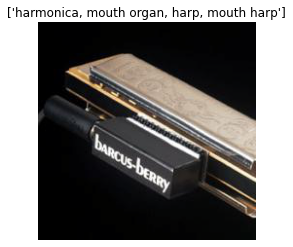

In [99]:
images , pred = show_batch_images(evalloader)

In [0]:
torch.max?

In [100]:
outputs = model(images)
print(outputs.shape)
outputs = nn.functional.softmax(outputs, dim=1) # to get the probabilites of the output 
prob_no_occ , pred = torch.max(outputs.data,1)
prob_no_occ = prob_no_occ[0].item()
print(prob_no_occ)



torch.Size([1, 1000])
0.9984715580940247


In [0]:
def occlusion(model, image, label, occ_size = 50 , occ_stride = 50 , occ_pixle =0.5):
  width , height = image.shape[-2], image.shape[-1]

  output_width =  int(np.ceil((width - occ_size)/occ_stride))
  output_height = int(np.ceil((height - occ_size)/occ_stride))

  heatmap = torch.zeros((output_width,output_height))

  for h in range(0,height):
    for w in range(0,width):

      h_start = h * occ_stride
      w_start = w * occ_stride 

      h_end = min(height, h_start + occ_size)
      w_end = min(width, w_start + occ_size) 

      if (w_end >=width ) or (h_end >= height):
        continue 
      
      input_image = image.clone().detach()
      input_image[:,:,w_start:w_end,h_start:h_end] = occ_pixle 

      output = model(input_image)
      output = nn.functional.softmax(output,dim=1)
      prob = output.tolist()[0][label]
      heatmap[h,w] = prob 

  return heatmap 



In [0]:
heatmap = occlusion(model,images,pred[0].item(),32,14)

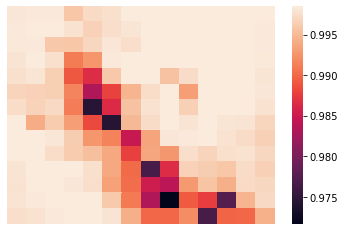

In [103]:
imgplot = sns.heatmap(heatmap,xticklabels=False, yticklabels=False, vmax=prob_no_occ)